In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Move to project root
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

sys.path.append('.')
from src.data_loader import WWTPDataLoader

# Load the data
loader = WWTPDataLoader(config_path="config/config.yaml")
df = loader.load_raw_data()

# Drop rows with missing values just for the PCA mapping
df_clean = df.dropna()

print(f"Data ready for PCA. Shape: {df_clean.shape}")

2026-02-17 21:30:41,177 - INFO - Configuration loaded successfully from config\config.yaml
2026-02-17 21:30:41,177 - INFO - Loading raw dataset from data\raw\Data-Melbourne_F_fixed.csv...
2026-02-17 21:30:41,185 - INFO - Dropped 'Unnamed: 0' artifact column.
2026-02-17 21:30:41,185 - INFO - Combining ['Year', 'Month', 'Day'] into datetime index...
2026-02-17 21:30:41,195 - INFO - Time-series index set successfully.


Data ready for PCA. Shape: (1382, 16)


In [2]:

# 1. Isolate the numeric sensor data
sensor_data = df_clean.select_dtypes(include='number')

# 2. Scale the data (Crucial for PCA!)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sensor_data)

# 3. Compress 16 dimensions down to 2 using PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# 4. Add the results back to a dataframe for easy plotting
pca_df = pd.DataFrame(data=pca_results, columns=['Principal Component 1', 'Principal Component 2'], index=df_clean.index)

# Show how much variance (information) we retained by keeping just 2 dimensions
variance_ratio = pca.explained_variance_ratio_
print(f"Information retained in 2D: {(variance_ratio[0] + variance_ratio[1]) * 100:.2f}%")

Information retained in 2D: 36.16%


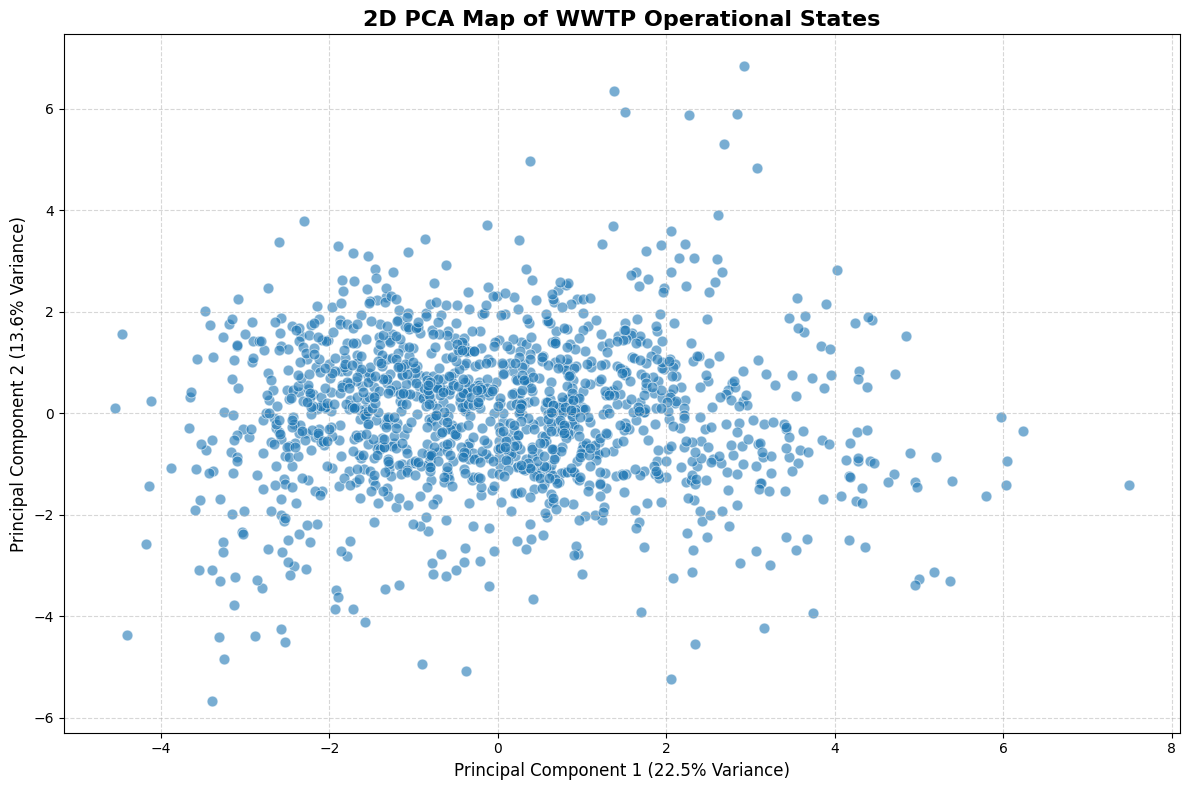

In [3]:
#  Visualizing the Plant's Operating Profile
plt.figure(figsize=(12, 8))

# Plot the 2D representation of the plant
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    data=pca_df, 
    alpha=0.6, 
    color='#1f77b4',
    edgecolor='w',
    s=60
)

plt.title('2D PCA Map of WWTP Operational States', fontsize=16, fontweight='bold')
plt.xlabel(f'Principal Component 1 ({variance_ratio[0]*100:.1f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({variance_ratio[1]*100:.1f}% Variance)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [4]:
# mormal operation cloud
# dense cluster of dots sitting right in the middle of the graph (roughly between
# -2 and 2 on both axes). MOst days of the year, the hydraulic flow, chemical oxygen \
# demand, and energy consumption all balance out

In [5]:
# shock loads (the outlliers)
# the dots floating way out on the far right (past pc1=6) or way down at the bottom
# (pc2=-6) are the extreme operational days. could be extreme storm, toxic biological 
# schock in the wwtp, or sensor failure

In [6]:
# The 36.16% variance reality check
# information reatained in 2D: 36.16%
# with probably a lot of sensors, 36% is normal
# the plant is too complex to monitor with just 2D visual graphs.
